# Sentiment Analysis using LSTM (TensorFlow/Keras)

In [ ]:
# !pip uninstall -y protobuf
# !pip install protobuf==3.20.3
# !pip install --force-reinstall --no-deps tensorflow==2.15.0

In [ ]:
# 1. Importing Libraries yang dibutuhkan

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2025-11-09 01:19:46.604295: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-09 01:19:46.604350: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-09 01:19:46.606020: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# 2. Load Dataset
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')  
texts = df['review'].astype(str).tolist()
# Convert "positive" -> 1 , "negative" -> 0
labels = (df['sentiment'] == "positive").astype(int).values



In [ ]:
# 3. Preprocessing Data dan Tokenisasi
MAX_WORDS = 10000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
seqs = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(seqs, maxlen=MAX_LEN, padding='post')

vocab_size = len(tokenizer.word_index) + 1


In [ ]:
# 4. Splitting Dataset
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)


In [ ]:
# 5. Membangun dan Melatih Model LSTM
Embedding_dim = 64

model = models.Sequential([
    layers.Embedding(vocab_size, Embedding_dim),
    layers.LSTM(128, return_sequences=False),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 6. Menyiapkan Callbacks untuk Training Model

callbacks = [
    ReduceLROnPlateau(
        monitor='val_accuracy',
        patience=3,
        factor=0.5,
        min_lr=1e-5,
        verbose=1
    ), 

    EarlyStopping(
        monitor='val_loss',
        patience=3, 
        restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath="best_model.h5",
        monitor="val_accuracy",
        mode="max",
        save_best_only=True,
        save_weights_only=False,     
        verbose=1
    )
]

In [ ]:
# 7. Melatih Model
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    verbose=1,
    callbacks=callbacks
)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.7000 - loss: 0.5469
Epoch 1: val_accuracy improved from -inf to 0.85013, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 140ms/step - accuracy: 0.7002 - loss: 0.5467 - val_accuracy: 0.8501 - val_loss: 0.3575 - learning_rate: 0.0010
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8774 - loss: 0.3049
Epoch 2: val_accuracy did not improve from 0.85013
500/500 ━━━━━━━━━━━━━━━━━━━━ 71s 142ms/step - accuracy: 0.8774 - loss: 0.3049 - val_accuracy: 0.8457 - val_loss: 0.3389 - learning_rate: 0.0010
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9106 - loss: 0.2329
Epoch 3: val_accuracy improved from 0.85013 to 0.85950, saving model to best_model.h5


500/500 ━━━━━━━━━━━━━━━━━━━━ 67s 134ms/step - accuracy: 0.9106 - loss: 0.2329 - val_accuracy: 0.8595 - val_loss: 0.3364 - learning_rate: 0.0010
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.9334 - loss: 0.1831
Epoch 4: val_accuracy did not improve from 0.85950
500/500 ━━━━━━━━━━━━━━━━━━━━ 69s 137ms/step - accuracy: 0.9334 - loss: 0.1831 - val_accuracy: 0.8504 - val_loss: 0.3922 - learning_rate: 0.0010
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9487 - loss: 0.1460
Epoch 5: val_accuracy did not improve from 0.85950
500/500 ━━━━━━━━━━━━━━━━━━━━ 70s 140ms/step - accuracy: 0.9487 - loss: 0.1460 - val_accuracy: 0.8508 - val_loss: 0.4023 - learning_rate: 0.0010
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.9647 - loss: 0.1034
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 6: val_accuracy did not improve from 0.85950
500/500 ━━━━━━━━━━━━━━━━━━━━ 66s 133ms/step - accuracy: 0.9647 - loss: 0.1

In [ ]:
# 8. Evaluasi Model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.8564 - loss: 0.3208
Test Accuracy: 0.8598


In [ ]:
# 8. Menghitung dan Menampilkan Metode Evaluasi Lainnya
# Prediksi probabilitas (output sigmoid)
y_pred_prob = model.predict(X_test)

# Ubah jadi binary (0 atau 1)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)
f1        = f1_score(y_test, y_pred)

print("=== Evaluation Metrics ===")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1-Score  : {f1:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
=== Evaluation Metrics ===
Accuracy  : 0.8598
Precision : 0.8606
Recall    : 0.8613
F1-Score  : 0.8609


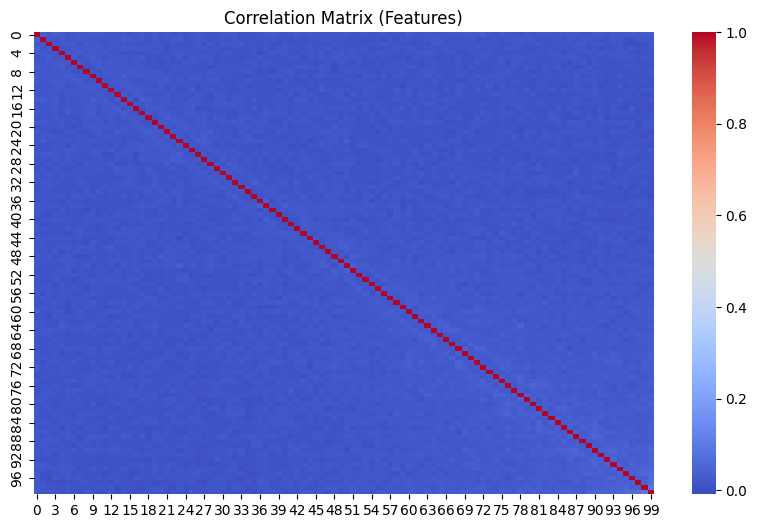

In [ ]:
# 9. Visualisasi Correlation Matrix

# Jika X_train masih array numpy → ubah ke dataframe
df = pd.DataFrame(X_train)

# Correlation matrix
corr = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix (Features)")
plt.show()


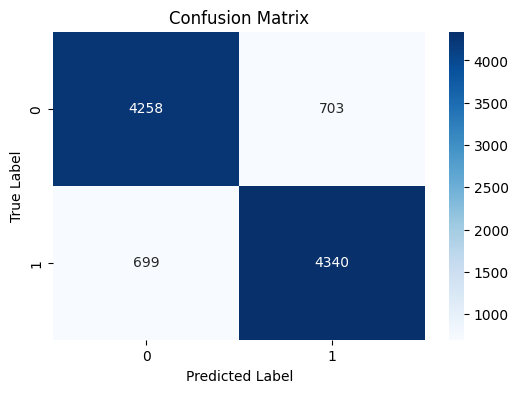

In [ ]:
# 10. Visualisasi Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
     

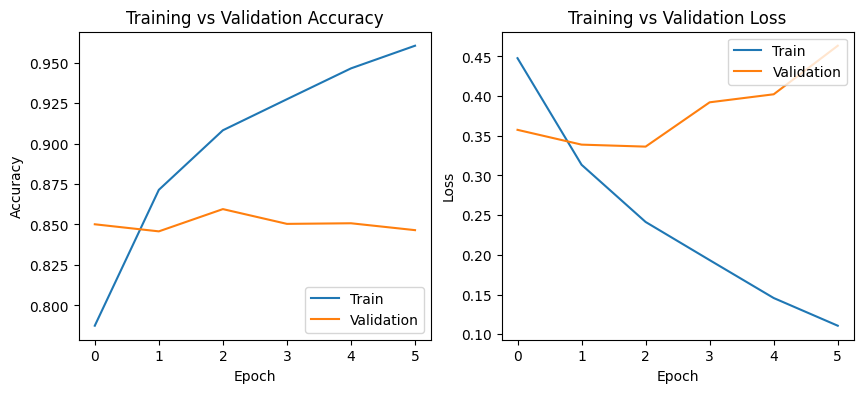

In [ ]:
# 11. Plot training & validation accuracy
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="lower right")

# Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper right")

plt.show()


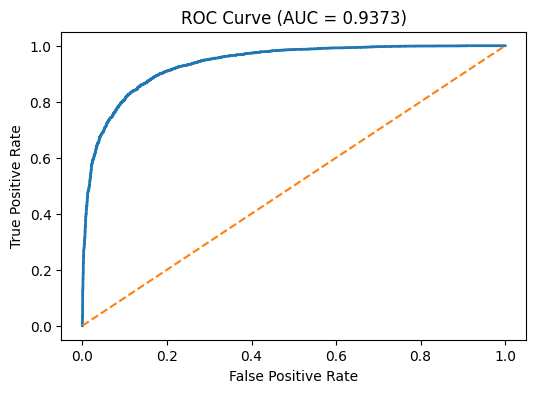

In [ ]:
# 12. Plot ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve (AUC = {roc_auc:.4f})")
plt.show()


In [ ]:
# 13. Menggunakan Model untuk Prediksi Baru
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=MAX_LEN, padding='post')
    pred = model.predict(pad)
    return "Positive" if pred[0][0] > 0.5 else "Negative"

print(predict_sentiment("I love this!"))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Positive


In [ ]:
# 14. Menyimpan Model jika diperlukan
model.save("model_lstm_binary.h5")
print("✅ Model berhasil disimpan sebagai model_lstm_binary.h5")

✅ Model berhasil disimpan sebagai model_lstm_binary.h5


In [1]:
import json

# contoh: class_names berasal dari dataset
class_names = ["negative", "positive"]  # atau raw_train_ds.class_names jika pakai image_dataset_from_directory

with open("class_names.json", "w") as f:
    json.dump(class_names, f)

print("✅ class_names.json berhasil disimpan")


✅ class_names.json berhasil disimpan
